Mostrar la cantidad y la media de películas producidas por año y por plataforma. Crear un gráfico que
muestre los resultados por plataforma.

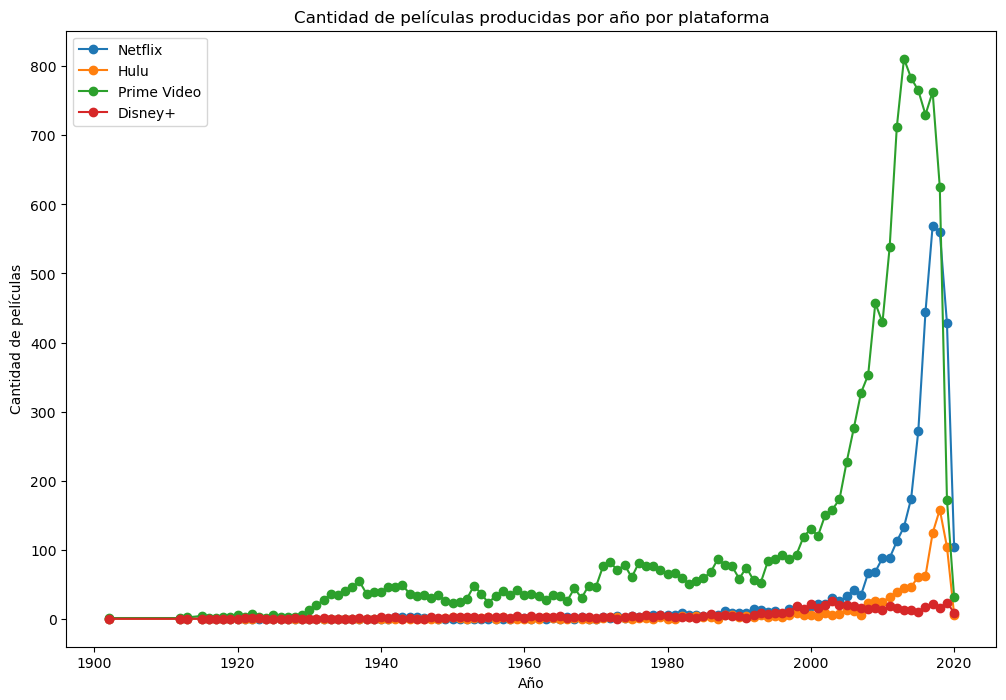

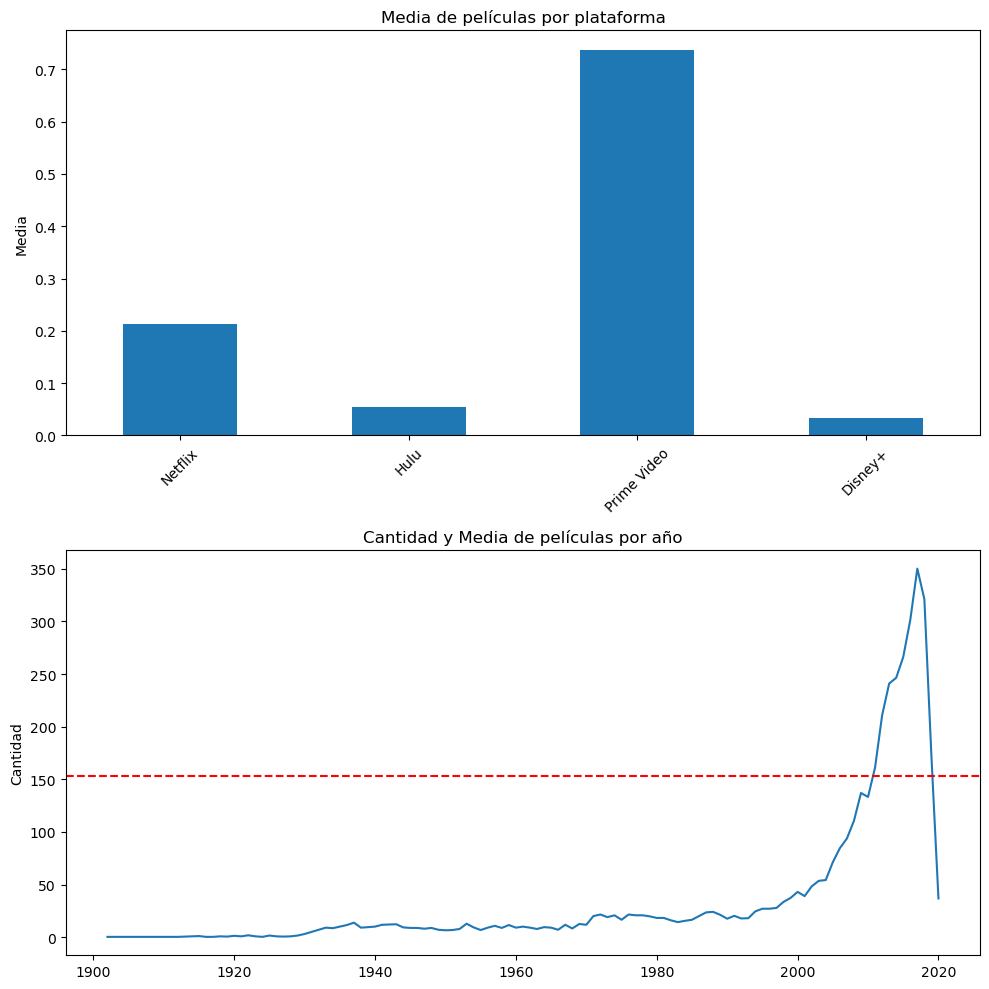

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import os




#Comprueba la carpeta de trabajo actual

PATH_FILE = os.getcwd()
PATH_DATA = PATH_FILE + "\\data\\"

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv(PATH_DATA+'MoviesOnStreamingPlatforms_updated.csv')

# Calcular la cantidad y la media de películas producidas por año por plataforma
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
anual_counts = data.groupby('Year')[platforms].sum().reset_index()
platform_means = data[platforms].mean()
year_counts = data['Year'].value_counts().sort_index()
year_mean = year_counts/4

#calcular la media global
global_year_mean = year_counts.mean()



# Crear un gráfico para la cantidad de películas por plataforma
plt.figure(figsize=(12, 8))
plt.plot(anual_counts['Year'], anual_counts[platforms], marker='o')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Cantidad de películas producidas por año por plataforma')
plt.legend(platforms)
plt.show()

# Crear una figura con dos subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
# Crear un gráfico de barras para la media de películas por plataforma
platform_means.plot(kind='bar', ax=axs[0])
axs[0].set_title('Media de películas por plataforma')
axs[0].set_ylabel('Media')
for tick in axs[0].get_xticklabels():
    tick.set_rotation(45)

# Crear un gráfico de líneas para la media de películas por año
year_mean.plot(kind='line', ax=axs[1])
axs[1].axhline(y=global_year_mean, color='r', linestyle='--', label='Media')
axs[1].set_title('Cantidad y Media de películas por año')
axs[1].set_ylabel('Cantidad')

# Ajustar el layout
plt.tight_layout()
plt.show()


Mostrar y crear un gráfico de las películas recomendadas por edad por plataforma

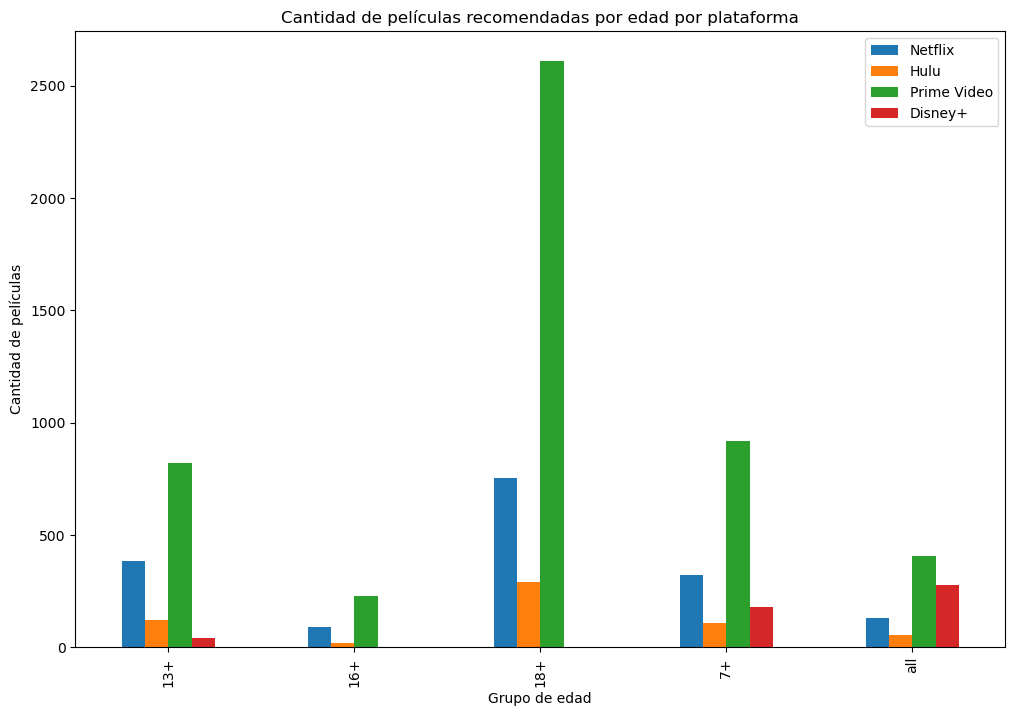

In [12]:
# Calcular la cantidad de películas recomendadas por edad por plataforma
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
age_groups = data['Age']
age_platform_counts = data.groupby(['Age'])[platforms].sum().reset_index()

# Crear un gráfico que muestre los resultados por plataforma
age_platform_counts.plot(x='Age', y=platforms, kind='bar', figsize=(12, 8))

# Etiquetas y título
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad de películas')
plt.title('Cantidad de películas recomendadas por edad por plataforma')

# Mostrar el gráfico
plt.show()

Mostrar las cinco películas con mejor valoración (rating) en general y por plataforma

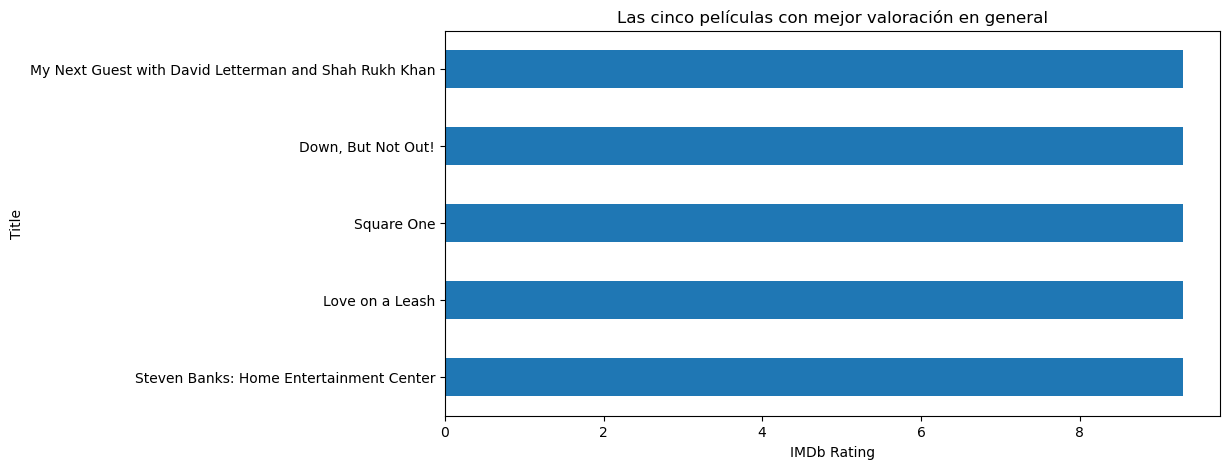

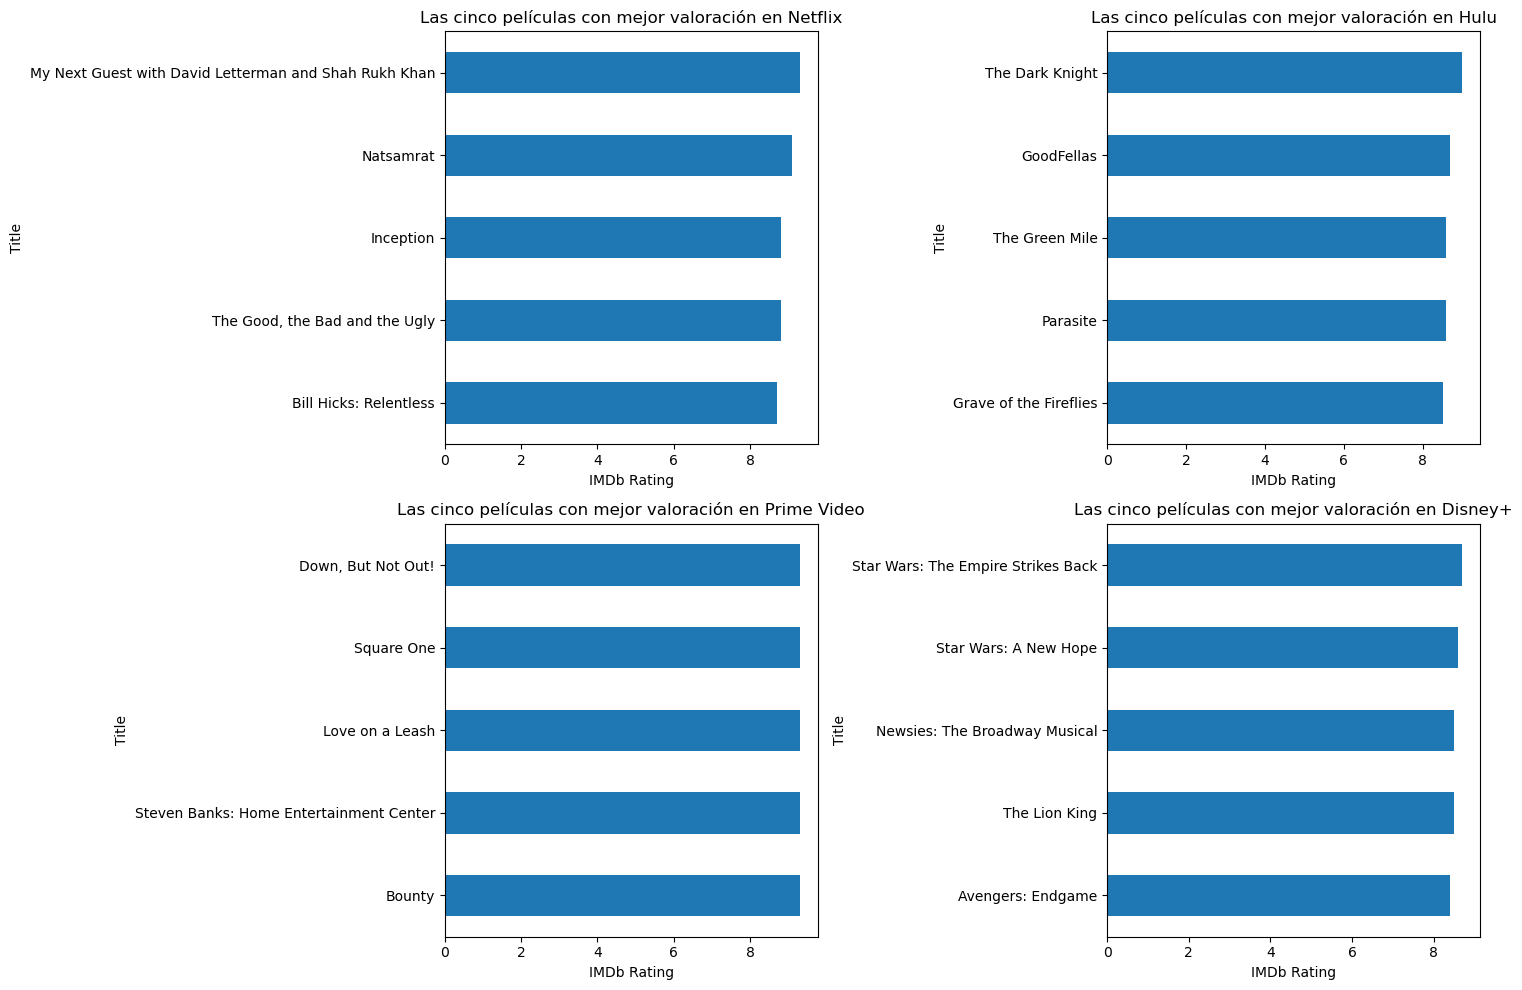

In [14]:
#RATING DE IMDB
# Ordenar las películas por valoración (rating) de IMDb en orden descendente
sorted_data = data.sort_values(by='IMDb', ascending=False)

# Crear un gráfico de barras horizontales para las cinco películas con mejor valoración en general
top_movies_general = sorted_data[['Title', 'IMDb']].head()
top_movies_general.plot(kind='barh', x='Title', y='IMDb', legend=False, figsize=(10, 5))
plt.xlabel('IMDb Rating')
plt.title('Las cinco películas con mejor valoración en general')
plt.gca().invert_yaxis()
plt.show()

# Crear un gráfico de barras horizontales para las cinco películas con mejor valoración por plataforma
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, platform in enumerate(platforms):
    platform_movies = sorted_data[sorted_data[platform] == 1]
    top_movies = platform_movies[['Title', 'IMDb']].head(5)
    top_movies.plot(kind='barh', x="Title", y='IMDb', legend=False, ax=axs[i])
    axs[i].set_xlabel('IMDb Rating')
    axs[i].set_title(f'Las cinco películas con mejor valoración en {platform}')
    axs[i].invert_yaxis()
    

plt.tight_layout()
plt.show()

Mostrar y crear un gráfico que muestre la cantidad de películas disponibles por plataforma

Netflix         3560
Hulu             903
Prime Video    12354
Disney+          564
dtype: int64


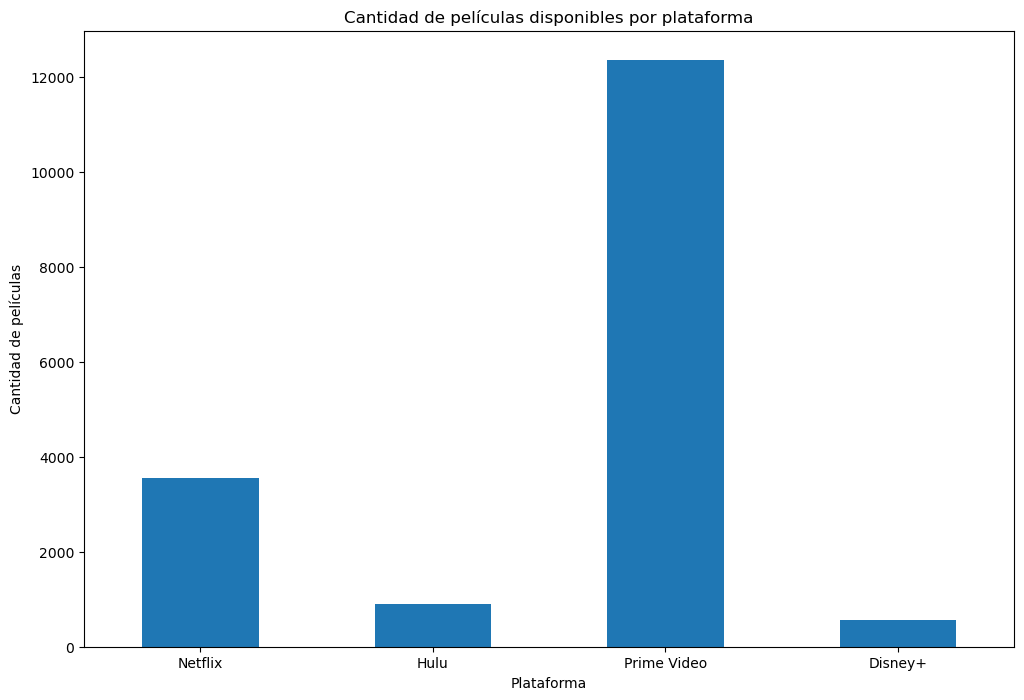

In [16]:
# Calcular la cantidad de películas disponibles por plataforma

platform_counts = data[platforms].sum()

# Mostrar la cantidad de películas disponibles por plataforma
print(platform_counts)

# Crear un gráfico que muestre los resultados por plataforma
platform_counts.plot(kind='bar', figsize=(12, 8))

# Etiquetas y título
plt.xlabel('Plataforma')
plt.ylabel('Cantidad de películas')
plt.title('Cantidad de películas disponibles por plataforma')
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()

Mostrar en que plataformas está disponible una película (utilizar funciones)

In [36]:
def encuentra_plataformas(title, datos = data):
    movie = data[data['Title'] == title]
    
    if movie.empty:
        print(f"No se encontró la película '{title}'.")
    else:
        print(f"La película '{title}' está disponible en las siguientes plataformas:")
        for platform in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']:
            if movie[platform].iloc[0] == 1:
                print(f"{platform}")
                
def busca_pelis():
    peli = input("¿Qué película deseas buscar? \n ")
    return encuentra_plataformas(peli)
    
busca_pelis()

¿Qué película deseas buscar? 
 Inception
La película 'Inception' está disponible en las siguientes plataformas:
Netflix


Muestre la media del IMDb rating por plataforma

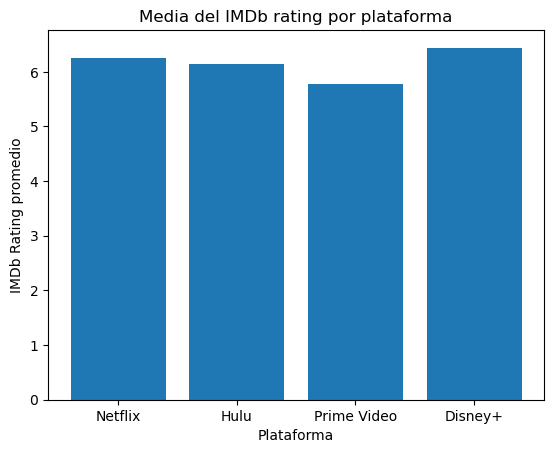

In [14]:
mean_ratings = {}

for platform in platforms:
    platform_movies = data[data[platform] == 1]
    mean_rating = platform_movies['IMDb'].mean()
    mean_ratings[platform] = mean_rating

# Crear un gráfico de barras para mostrar la media del IMDb rating por plataforma
plt.bar(mean_ratings.keys(), mean_ratings.values())

# Etiquetas y título
plt.xlabel('Plataforma')
plt.ylabel('IMDb Rating promedio')
plt.title('Media del IMDb rating por plataforma')

# Mostrar el gráfico
plt.show()

# Conclusiones

Aunque ya había trabajado bastante en la visualización de datos y su estudio estadístico en otros programas (Rstudio, Matlab...) Nunca había usado el entorno Dataframe de pandas que ayuda bastante a la organización y estructuración de los datos. Es este entorno el que más me ha costado hacer que funcionara ya que estoy acostumbrado a usar .txt para volcar los datos.
La parte que más me costó entender es como recorrer los bucles for con un Dataframe. 
Aunque ha sido una tabla con pocas columnas veo el potencial que tiene este tipo de estructuras a la hora de la visualización y organización de los datos e intentaré usarla en los futuros estudios que realice